# Setup

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
plt.style.use("seaborn-darkgrid")
pd.set_option('display.max_columns', None)  

import sys, os, yaml

DATASET = "Churn"
COLAB = 'google.colab' in sys.modules
DEBUG = False
SEED = 666


C:\Users\pedro\AppData\Local\Temp\ipykernel_3172\2207439663.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


# Load Dataset

In [11]:
COLAB = 'google.colab' in sys.modules

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

In [12]:
df = pd.read_pickle(f"{ROOT}/data/data.pkl")
print(df.shape)
df.head()

(7032, 20)


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA - First steps
 * Look at target
 * For each numerical variable, describe, histogram/barplot
 * For each categorical variable, value_counts, countplot

## Target

In [13]:
target = "Churn"

print(df[target].dtype)

df[target].value_counts(normalize=True)


category


Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

**Comments**
 * Target `Churn` is categorical so we have a classification problem. Only two levels so is a `binary classification`.
 * Problem is unblaanced 73% No and 27% Yes, so a dumb classifier will predict correctly 73% of the time when using accuracy as the metric.
 * Should consider better metric, and will use stratification when doing the train/test split. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   Tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 non-nu

In [15]:
columns = list(df.select_dtypes('category'))
columns.remove(target)
print(columns)

['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Gender

Gender
Male      3549
Female    3483
Name: count, dtype: int64

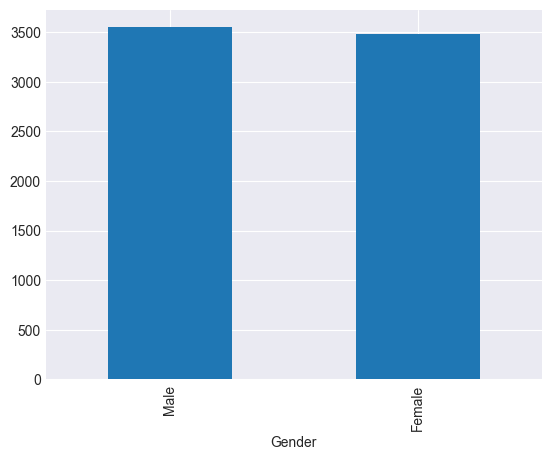

### SeniorCitizen

SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64

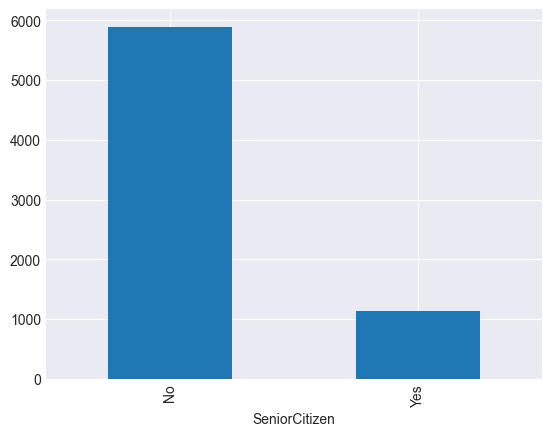

### Partner

Partner
No     3639
Yes    3393
Name: count, dtype: int64

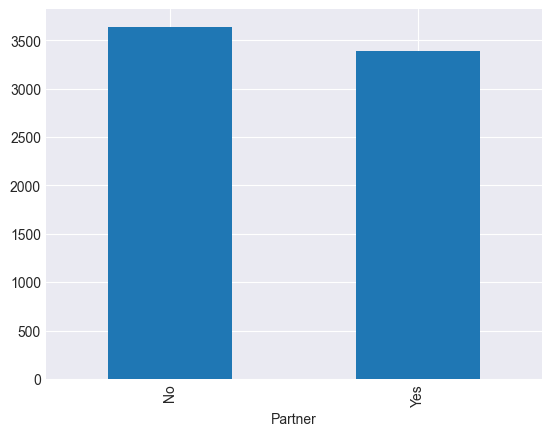

### Dependents

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

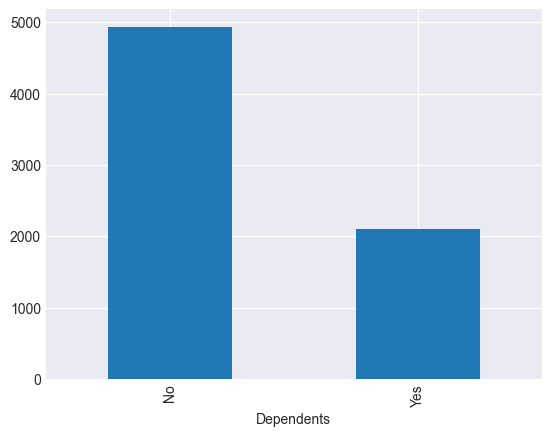

### PhoneService

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

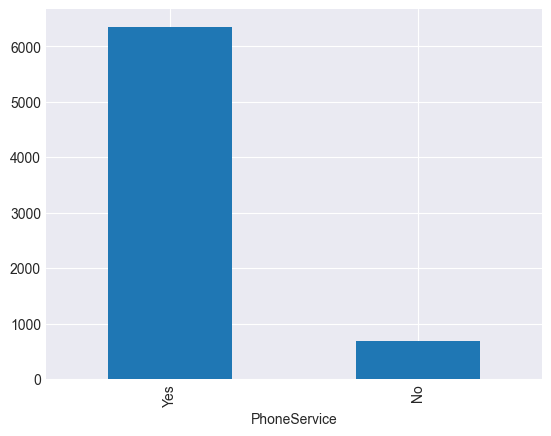

### MultipleLines

MultipleLines
No     4065
Yes    2967
Name: count, dtype: int64

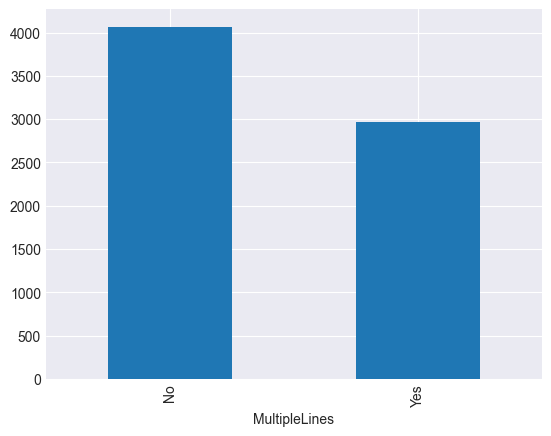

### InternetService

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

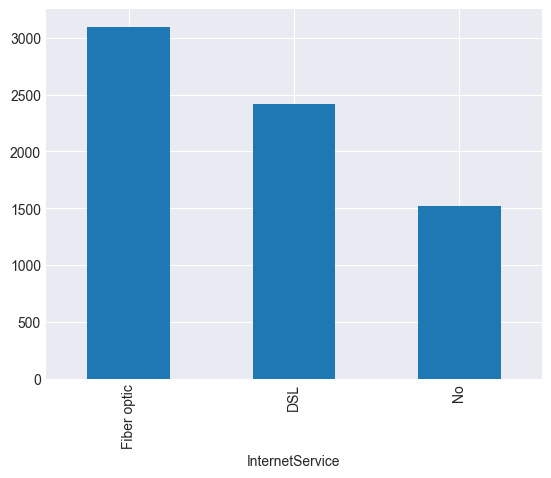

### OnlineSecurity

OnlineSecurity
No     5017
Yes    2015
Name: count, dtype: int64

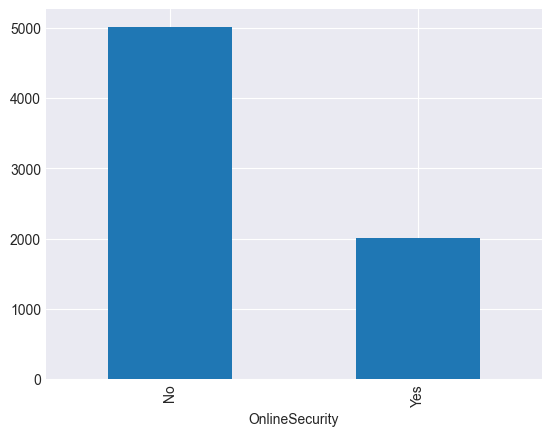

### OnlineBackup

OnlineBackup
No     4607
Yes    2425
Name: count, dtype: int64

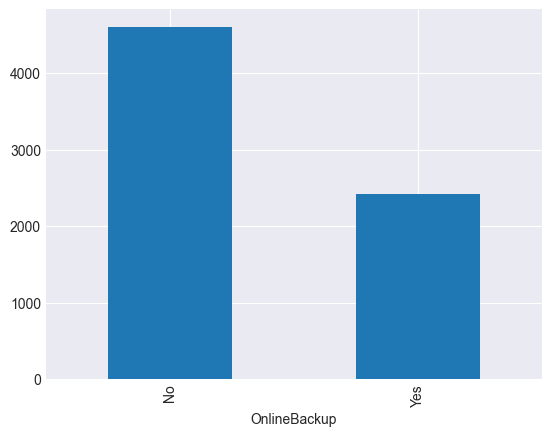

### DeviceProtection

DeviceProtection
No     4614
Yes    2418
Name: count, dtype: int64

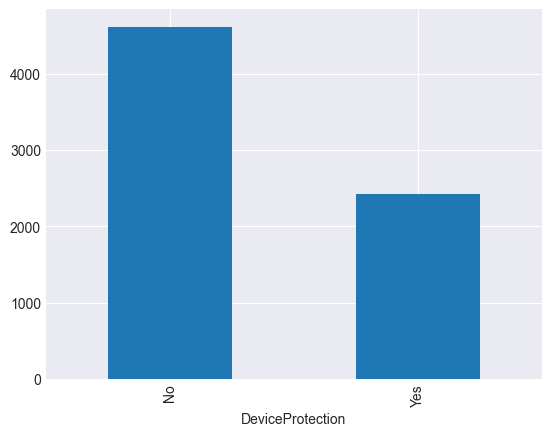

### TechSupport

TechSupport
No     4992
Yes    2040
Name: count, dtype: int64

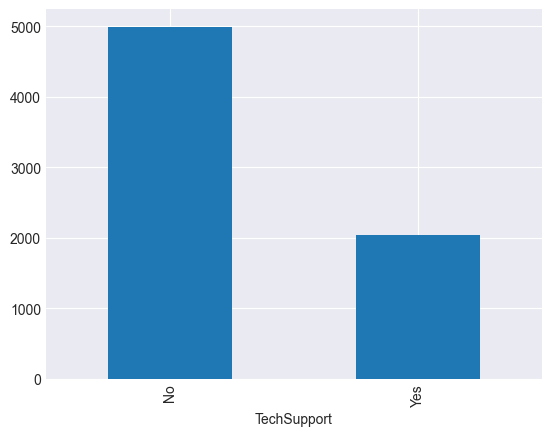

### StreamingTV

StreamingTV
No     4329
Yes    2703
Name: count, dtype: int64

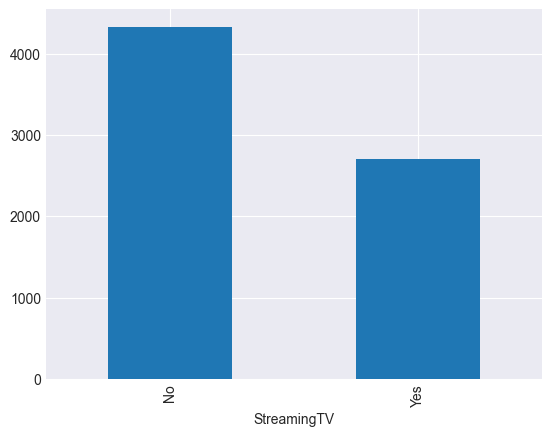

### StreamingMovies

StreamingMovies
No     4301
Yes    2731
Name: count, dtype: int64

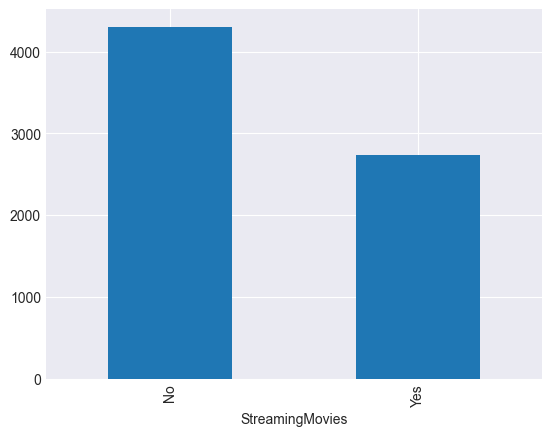

### Contract

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

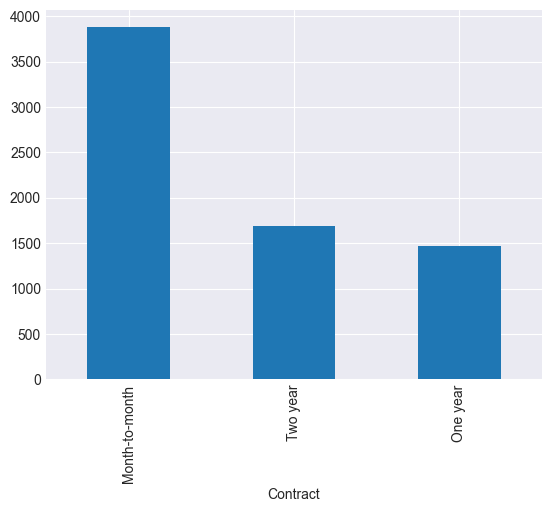

### PaperlessBilling

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64

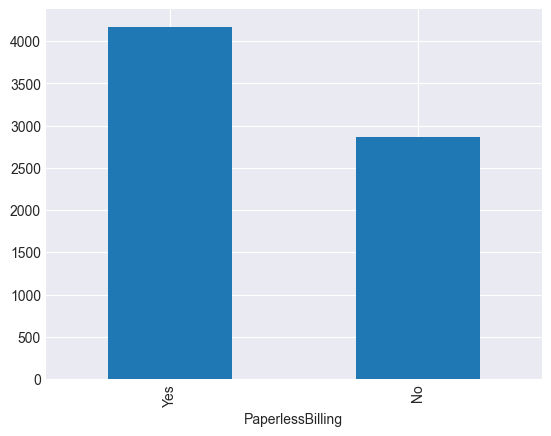

### PaymentMethod

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

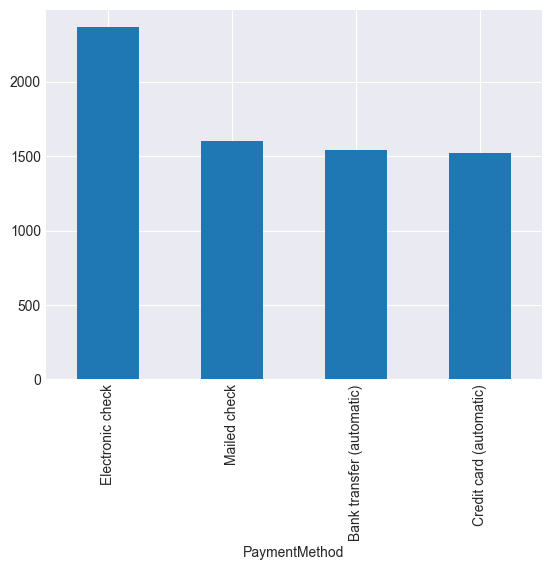

In [16]:
for c in columns:
    display(Markdown(f"### {c}"))
    display(df[c].value_counts(dropna = False))
    df[c].value_counts().plot(kind = "bar")
    plt.show()

**Comments**
* All categorical features are usable without change.

"usable" - good number category levels (2-6), and all level are adequatly represented (none rare levels)

In [17]:
columns = list(df.select_dtypes(['int','float']).columns)
print(columns)

['Tenure', 'MonthlyCharges', 'TotalCharges']


### Tenure

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

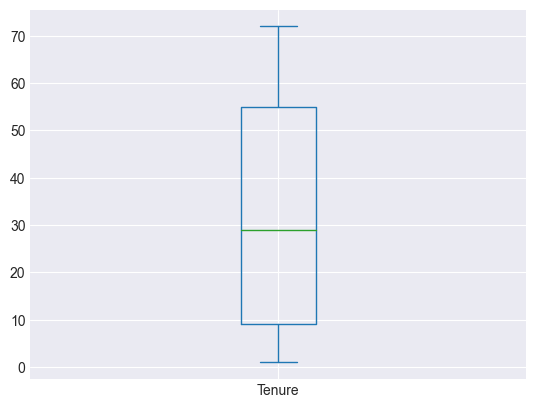

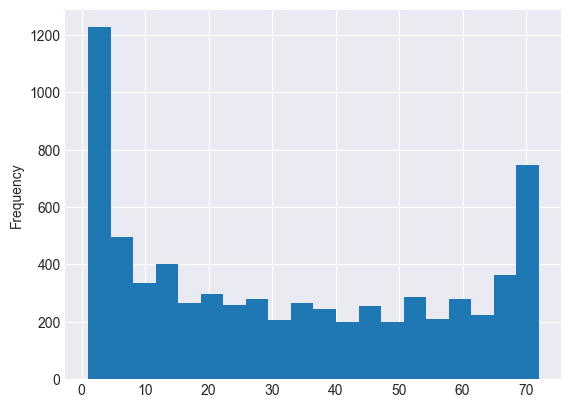

### MonthlyCharges

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

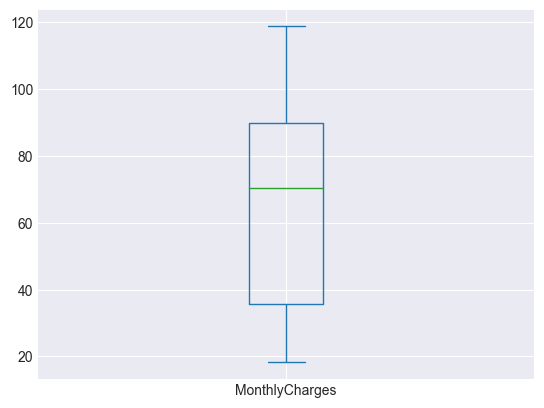

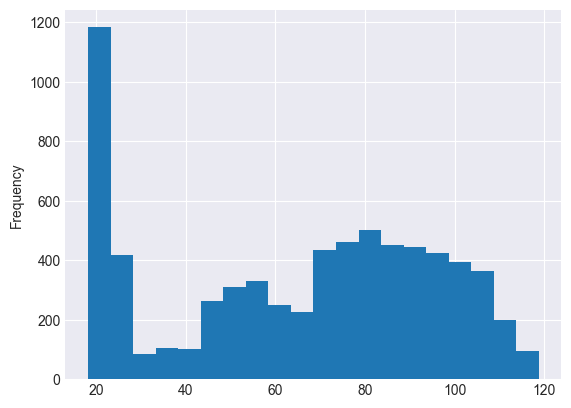

### TotalCharges

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

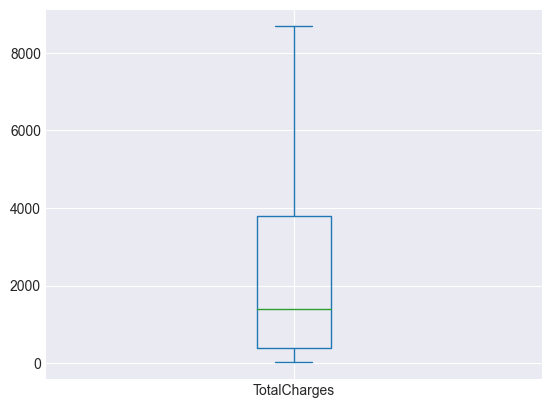

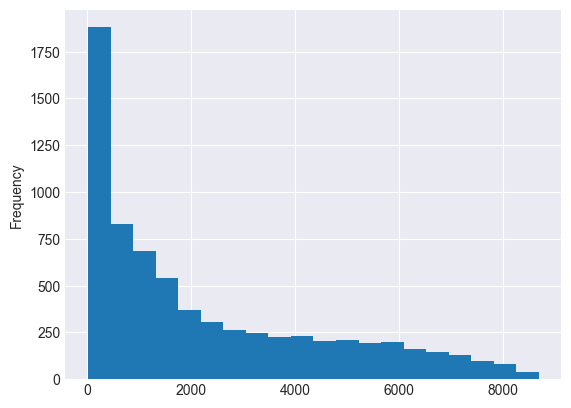

In [18]:
for c in columns:
    display(Markdown(f"### {c}"))
    display(df[c].describe())
    df[c].plot(kind = "box")
    plt.show()
    df[c].plot(kind = "hist", bins = 20)
    plt.show()

Numerical variables are all reasonably symmetric so no need for transformation. No outliers shown in boxplot

**Comments**

 * `Tenure` is not normaly distributed but this is not an issue if using decision-tree classifiers, more of a problem for logistic regression as breaks model assumptions but probably won't affect model performance.
 * `MonthlyCharges` has a bin with large frequency at lower end. Suggests creating a binary feature to represent those cases.
 * `TotalCharges` is right skewed, so may come back to transform this later.
 
 * No features had outliers.